In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.stats import randint
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('Salary Data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:

df.dropna(inplace=True)


df.drop_duplicates(inplace=True)


df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'])

In [6]:
scaler = StandardScaler()
df[['Age', 'Years of Experience']] = scaler.fit_transform(df[['Age', 'Years of Experience']])

In [7]:
y = df.Salary

In [8]:
y.shape

(324,)

In [9]:
X = df.drop(['Salary'], axis=1)

In [10]:
X.shape

(324, 181)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features':[1, 2, 3, 4, 5, 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [13]:
rf_regressor = RandomForestRegressor(random_state=0)

In [14]:
random_search= RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100, cv=5, random_state=0, n_jobs=-1)

In [15]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [1, 2, 3, 4, 5, 'sqrt',
                                                         'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020506FA0B10>},
                   random_state=0)

In [16]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 52}
Best Score: 0.9012607674542277


In [17]:
best_rf = random_search.best_estimator_
y_pred = random_search.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Optimized Random Forest - R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

Optimized Random Forest - R^2 Score: 0.9038728288615178
Mean Squared Error: 181659876.65787944


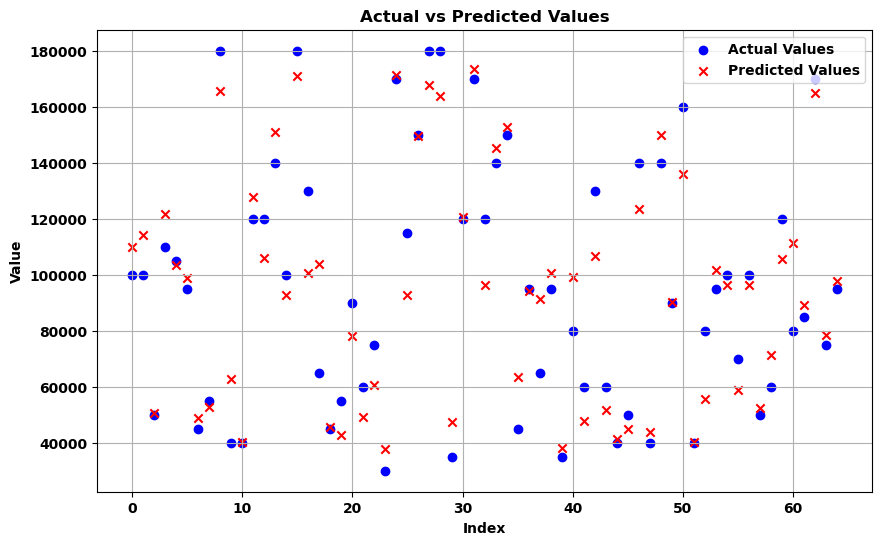

In [19]:
import matplotlib.pyplot as plt


# Plot the actual vs predicted values in one figure
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()